## 1. Загрузка и первичный анализ данных

Загружаем обучающий датасет и выполняем базовый осмотр:
- Просматриваем первые 10 строк,
- Изучаем типы данных и наличие пропусков (`df.info()`),
- Анализируем статистику числовых признаков (`df.describe()`),
- Определяем категориальные колонки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train-3.csv', low_memory=False)

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## 2. Очистка "численных" признаков с текстовыми артефактами

Некоторые колонки, которые должны содержать числа (например, `Age`, `Annual_Income`, `Monthly_Balance`), на самом деле хранятся как строки и содержат символы-заполнители (`'_'`). 

Выполняем следующие шаги:
- Идентифицируем некорректные значения с помощью вспомогательной функции `check_for_non_numeric`,
- Заменяем `'_'` на пустые строки и приводим значения к числовому типу (`float`),
- Особый случай: `Changed_Credit_Limit` — пустые строки заменяем на `0`.

In [7]:
def check_for_non_numeric(x):
    try:
        float(x)
        return True
    except:
        return x
suspicious_cat_cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for col in suspicious_cat_cols:
    print(f'Column {col} has next non-numeric values:')
    print(df[col].apply(check_for_non_numeric).unique()[:50])

Column Age has next non-numeric values:
[True '28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_' '21_'
 '20_' '43_' '38_' '18_' '2111_' '46_' '16_' '19_' '47_' '53_' '25_' '27_'
 '55_' '42_' '48_' '49_' '50_' '32_' '22_' '17_' '29_' '15_' '51_' '26_'
 '39_' '14_' '36_' '44_' '7670_' '45_' '23_' '41_' '52_' '733_' '5769_'
 '4383_' '56_' '2650_']
Column Annual_Income has next non-numeric values:
[True '34847.84_' '30689.89_' '35547.71_' '34081.38_' '114838.41_'
 '88640.24_' '54392.16_' '8701.545_' '25546.26_' '92047.08_' '97791.42_'
 '10183.015_' '106733.13_' '12600.445_' '57983.12_' '34290.12_'
 '43070.24_' '6515990.0_' '39641.54_' '29469.98_' '15566.02_' '20574.47_'
 '148699.32_' '14165.23_' '81842.28_' '123732.32_' '78988.48_' '41746.76_'
 '73737.36_' '75273.24_' '54820.89_' '58674.66_' '30390.44_' '144546.72_'
 '30346.35_' '72330.98_' '43241.49_' '17787.34_' '134978.24_' '14841.35_'
 '66105.4_' '27070.07_' '17992.775_' '18305.25_' '14205.09_' '43758.34_'
 '144881.68_' '13432

In [8]:
for col in suspicious_cat_cols:
    df[col] = df[col].apply(lambda x: str(x).replace('_', ' ').strip() if pd.notna(x) else np.nan)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', 0)

for col in suspicious_cat_cols:
    df[col] = df[col].astype(float)

## 3. Коррекция признака "Возраст"

Возраст (`Age`) содержит недостоверные значения (отрицательные или >100 лет), а также пропуски. 

Для восстановления используем **групповую моду по `Customer_ID`**:
- Для каждого клиента вычисляем наиболее частый корректный возраст (в диапазоне 0–100),
- Заменяем аномальные и пропущенные значения на эту моду.

In [9]:
def compute_mode(ages):
    ages = ages.dropna()
    ages = ages[(ages > 0) & (ages < 100)]
    modes = ages.mode()
    return modes.iloc[0] if not modes.empty else np.nan

msk = ((df['Age'].isna()) | (df['Age'] < 0) | (df['Age'] > 100))
age_modes = df.groupby('Customer_ID')['Age'].apply(compute_mode)
df.loc[msk, 'Age'] = df['Customer_ID'].map(age_modes)

## 4. Преобразование признака "Возраст кредитной истории"

Исходный признак `Credit_History_Age` представлен в виде строки вида `"X Years and Y Months"`. 

Преобразуем его в **общее количество месяцев** для удобства дальнейшего анализа и моделирования.

In [10]:
def convert_history_to_months(x):
    if pd.isna(x):
        return np.nan
    else:
        ar = x.split()
        return int(ar[0])*12+int(ar[3])

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_history_to_months).astype(float)

## 5. Разведочный анализ данных (EDA)

### Распределение целевой переменной
Строим распределение `Credit_Score`, чтобы оценить степень дисбаланса классов.

### Взаимосвязь признаков с целевой переменной
Анализируем, как категории признаков `Occupation`, `Credit_Mix` и `Payment_of_Min_Amount` соотносятся с кредитным рейтингом. Это помогает понять, какие факторы наиболее влияют на оценку.

In [11]:
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 10,
    'figure.titlesize': 14
})

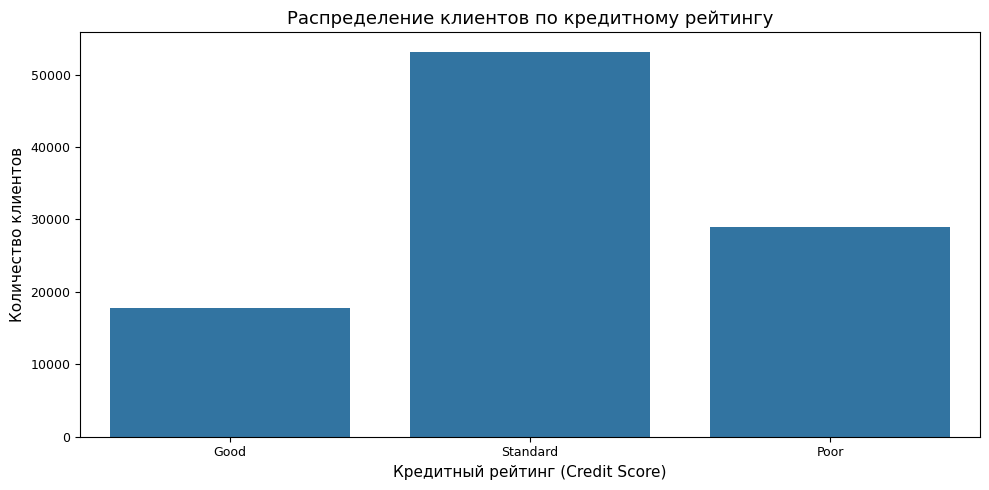

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Credit_Score')
ax.set_title('Распределение клиентов по кредитному рейтингу', fontsize=13)
ax.set_xlabel('Кредитный рейтинг (Credit Score)')
ax.set_ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

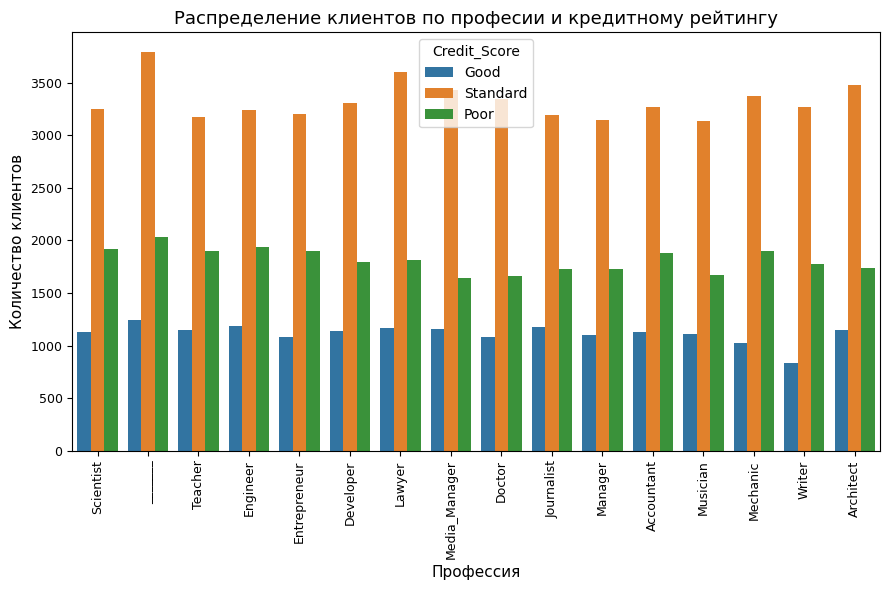

In [13]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Occupation', hue='Credit_Score')
ax.set_title('Распределение клиентов по професии и кредитному рейтингу', fontsize=13)
ax.set_xlabel('Профессия')
ax.set_ylabel('Количество клиентов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

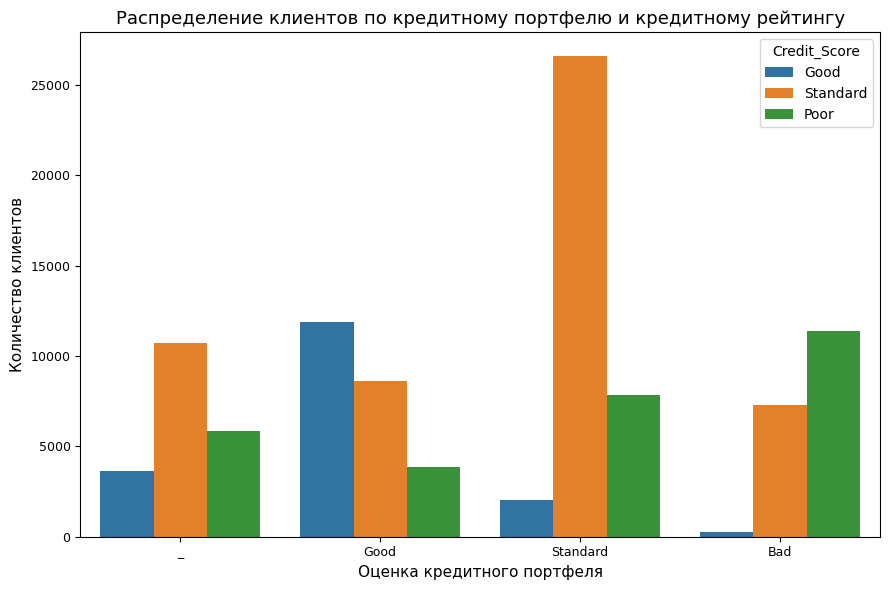

In [14]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Credit_Mix', hue='Credit_Score')
ax.set_title('Распределение клиентов по кредитному портфелю и кредитному рейтингу', fontsize=13)
ax.set_xlabel('Оценка кредитного портфеля')
ax.set_ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

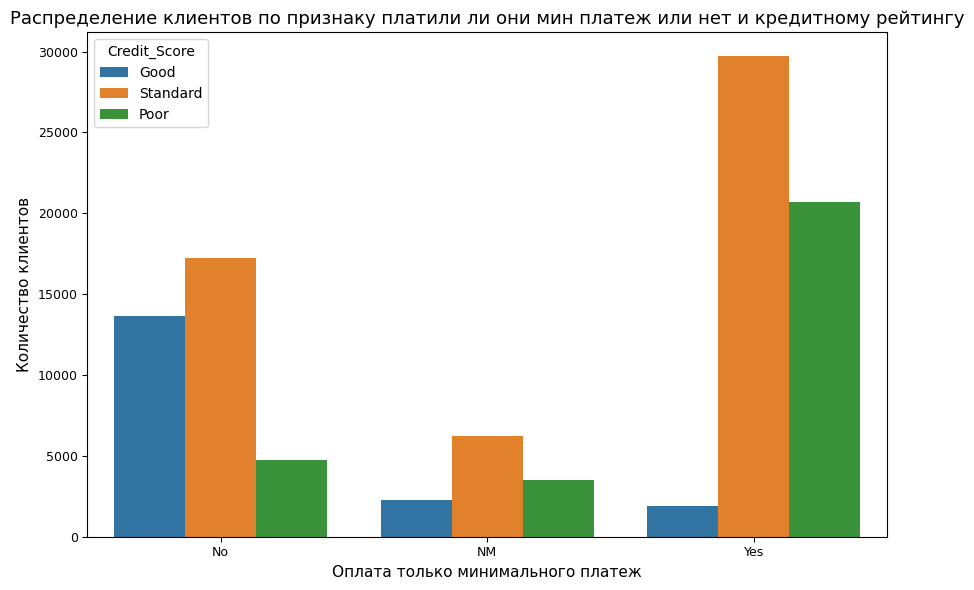

In [15]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Payment_of_Min_Amount', hue='Credit_Score')
ax.set_title('Распределение клиентов по признаку платили ли они мин платеж или нет и кредитному рейтингу', fontsize=13)
ax.set_xlabel('Оплата только минимального платеж')
ax.set_ylabel('Количество клиентов')
plt.tight_layout()
plt.show()
#Платил ли клиент только минимальный платеж?

## 6. Заполнение пропущенных значений в категориальных признаках

Пропуски в `Credit_Mix` и `Payment_of_Min_Amount` обозначены как `'_'` и `'NM'` соответственно. 

Для их восстановления используем **моду по `Customer_ID`** — предполагая, что у одного клиента характеристики стабильны во времени.

In [16]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mask(x == '_', x.mode()[0]))
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.mask(x == 'NM', x.mode()[0]))
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)

## 7. Анализ распределений числовых признаков

Для каждого числового признака строим:
- Общее распределение (гистограмма + KDE),
- Распределение по классам `Credit_Score`.

Это позволяет выявить признаки, которые хорошо разделяют классы, а также обнаружить выбросы.

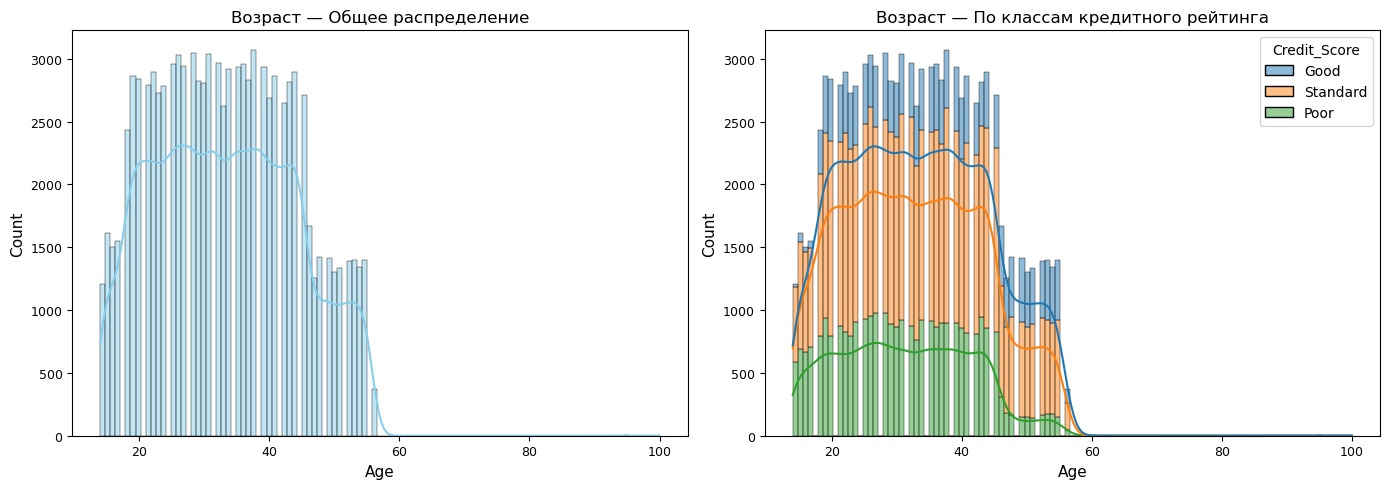

In [17]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Возраст — Общее распределение')
    
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', hue='Credit_Score', kde=True, multiple="stack")
plt.title('Возраст — По классам кредитного рейтинга')
    
plt.tight_layout()    
plt.show()

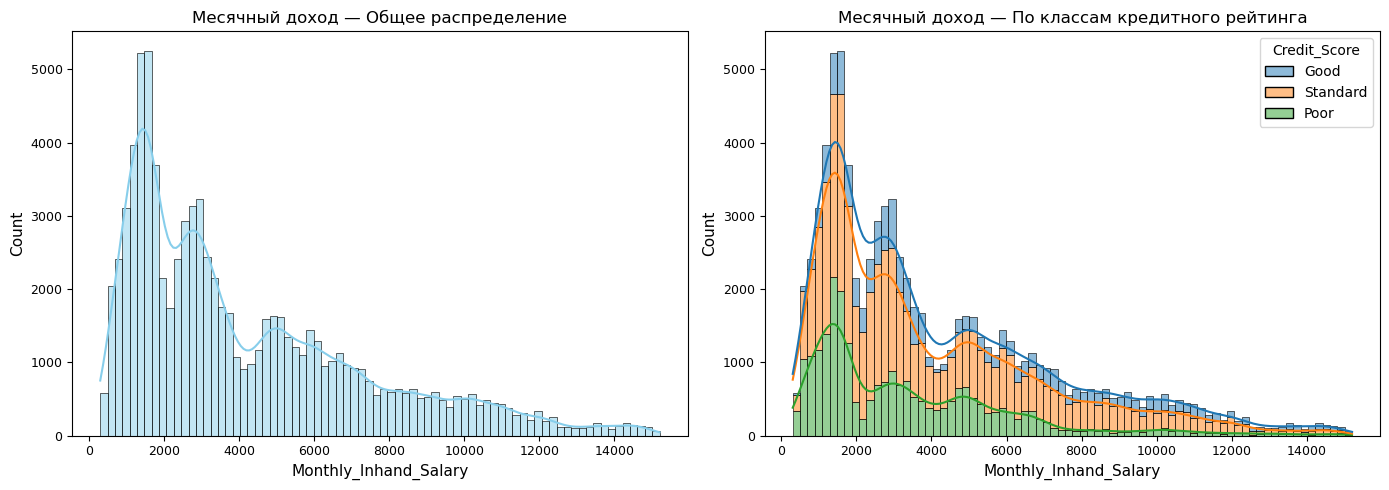

In [18]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Monthly_Inhand_Salary'].dropna(), kde=True, color='skyblue')
plt.title('Месячный доход — Общее распределение')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Monthly_Inhand_Salary', hue='Credit_Score', kde=True, multiple="stack")
plt.title('Месячный доход — По классам кредитного рейтинга')
plt.tight_layout()    
plt.show()

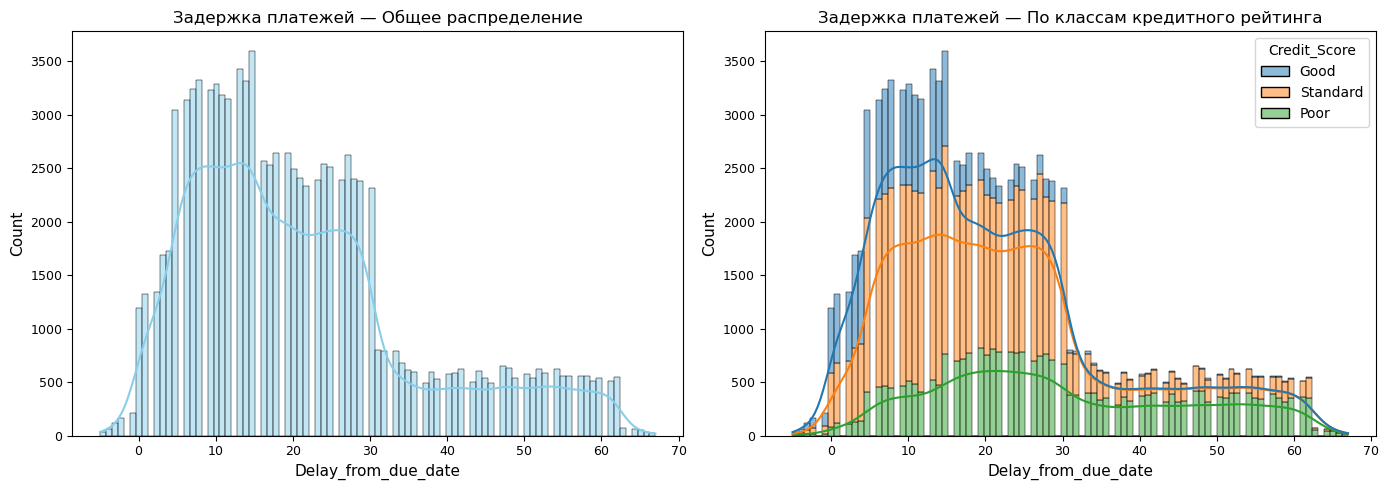

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Delay_from_due_date'].dropna(), kde=True, color='skyblue')
plt.title('Задержка платежей — Общее распределение')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Delay_from_due_date', hue='Credit_Score', kde=True, multiple="stack")
plt.title('Задержка платежей — По классам кредитного рейтинга')
plt.tight_layout()    
plt.show()

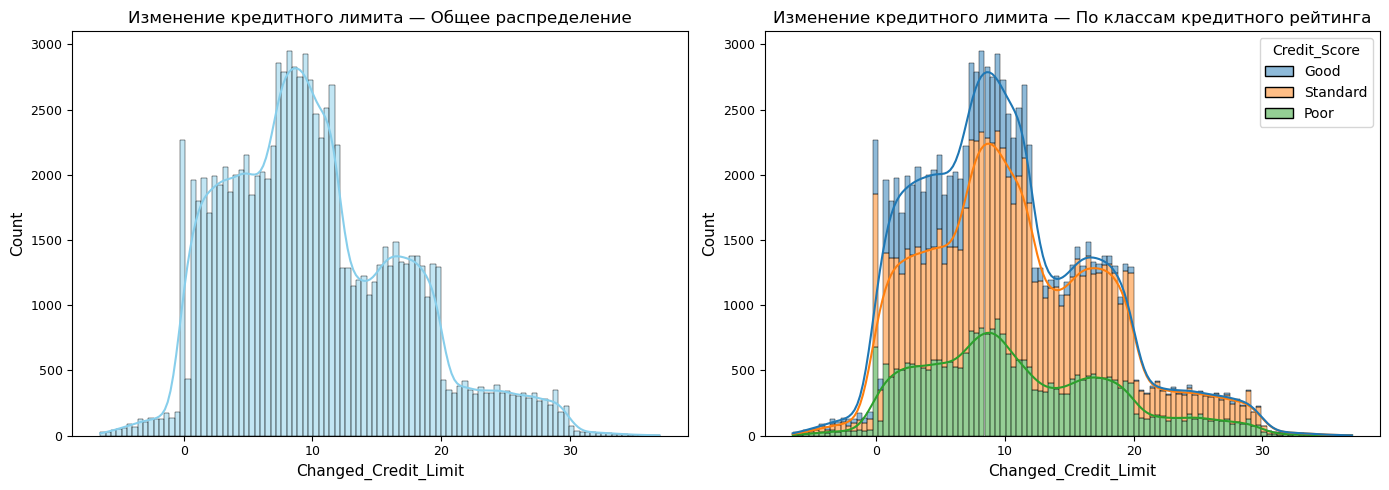

In [20]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Changed_Credit_Limit'].dropna(), kde=True, color='skyblue')
plt.title('Изменение кредитного лимита — Общее распределение')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Changed_Credit_Limit', hue='Credit_Score', kde=True, multiple="stack")
plt.title('Изменение кредитного лимита — По классам кредитного рейтинга')
plt.tight_layout()    
plt.show()

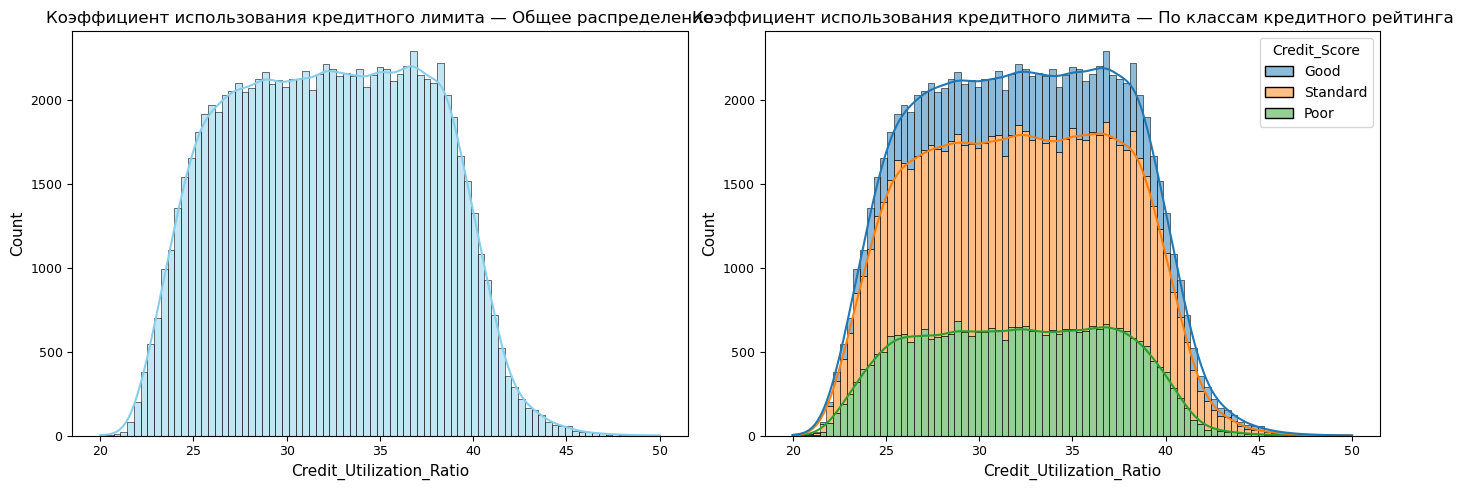

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Credit_Utilization_Ratio'].dropna(), kde=True, color='skyblue')
plt.title('Коэффициент использования кредитного лимита — Общее распределение')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Credit_Utilization_Ratio', hue='Credit_Score', kde=True, multiple="stack")
plt.title('Коэффициент использования кредитного лимита — По классам кредитного рейтинга')
plt.tight_layout()    
plt.show()

## 8. Фильтрация выбросов и формирование финального набора признаков

### Удаление явных аномалий
- Убираем записи с отрицательным количеством банковских счетов, кредитов, просрочек и балансом.
- Исправляем отрицательные значения `Num_of_Loan` на медиану.

### Отбор признаков
Удаляем признаки, которые:
- Не несут полезной информации для модели (`ID`, `Name`, `SSN`),
- Содержат слишком много пропусков или дублируют другие (`Monthly_Inhand_Salary`),
- Сложны для обработки без дополнительного парсинга (`Type_of_Loan`, `Payment_Behaviour`),
- Уже учтены через другие переменные (`Occupation` — после EDA решено исключить).

In [22]:
df = df[df['Num_Bank_Accounts'] >= 0]

msk = df['Num_of_Loan'] < 0
df.loc[msk, 'Num_of_Loan'] = df['Num_of_Loan'].median()

df = df[df['Delay_from_due_date'] >= 0]

df = df[df['Num_of_Delayed_Payment'] >= 0]

df = df[df['Monthly_Balance'] >= 0]

drop_columns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Payment_Behaviour', 'Type_of_Loan', 'Monthly_Inhand_Salary', 'Occupation']
df = df.drop(drop_columns, axis=1)

## 9. Заполнение оставшихся пропусков

После удаления части признаков анализируем оставшиеся пропуски. Большинство из них заполняем:
- Нулями (для признаков, где отсутствие = 0, например, `Num_of_Delayed_Payment`),
- Медианой (для `Monthly_Balance` — устойчиво к выбросам).

Финальный шаг — полное удаление строк с оставшимися `NaN` (их крайне мало).

In [23]:
for col in df.columns:
    cnt_nan = df[col].isnull().sum()
    if cnt_nan > 0:
        print(f'{col} has {cnt_nan} Nan Values {cnt_nan/len(df) * 100}%')

Num_Credit_Inquiries has 1783 Nan Values 1.9660381519461902%
Credit_Mix has 608 Nan Values 0.670415701841438%
Credit_History_Age has 8156 Nan Values 8.993273789833498%
Payment_of_Min_Amount has 405 Nan Values 0.4465762487595104%
Amount_invested_monthly has 4071 Nan Values 4.488918293086338%


In [24]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(0)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

In [25]:
df = df.dropna()

## 10. Кодирование категориальных признаков

Преобразуем оставшиеся категориальные переменные в числовой формат:
- `Credit_Mix`: порядковое кодирование (`Bad` → 0, `Standard` → 1, `Good` → 2),
- `Payment_of_Min_Amount`: бинарное кодирование (`Yes` → 1, `No` → 0).


In [26]:
credit_mix_order = {'Bad': 0, 'Standard': 1, 'Good': 2} 
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_order).astype(float)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0}).astype(float)

## 11. Обучение и сравнение моделей машинного обучения

Разделяем данные на обучающую и тестовую выборки с сохранением пропорций классов (`stratify`).

Обучаем и оцениваем несколько популярных алгоритмов:
- **Random Forest** — базовая модель на основе деревьев,
- **XGBoost** — градиентный бустинг с высокой точностью,
- **CatBoost** — устойчив к категориальным признакам и дисбалансу,
- **LightGBM** — быстрый и эффективный градиентный бустинг.

Оценка качества производится с помощью **classification report** (precision, recall, F1-score по классам).

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit_Score', axis=1), df['Credit_Score'], test_size=0.2, stratify=df['Credit_Score'])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [29]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

        Good       0.74      0.73      0.74      3119
        Poor       0.78      0.81      0.80      5241
    Standard       0.82      0.80      0.81      9576

    accuracy                           0.79     17936
   macro avg       0.78      0.78      0.78     17936
weighted avg       0.79      0.79      0.79     17936


In [30]:
from xgboost import XGBClassifier

y_train_coded = y_train.map({'Good': 2, 'Poor': 0, 'Standard': 1})
y_test_coded = y_test.map({'Good': 2, 'Poor': 0, 'Standard': 1})
xgb = XGBClassifier()
xgb.fit(X_train, y_train_coded)
pred_xgb = xgb.predict(X_test)

In [31]:
print(classification_report(y_test_coded, pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      5241
           1       0.79      0.78      0.79      9576
           2       0.67      0.72      0.69      3119

    accuracy                           0.76     17936
   macro avg       0.74      0.74      0.74     17936
weighted avg       0.76      0.76      0.76     17936


In [32]:
from catboost import CatBoostClassifier

catbst = CatBoostClassifier(verbose=False)
catbst.fit(X_train, y_train)
catbst_pred = catbst.predict(X_test)

In [33]:
print(classification_report(y_test, catbst_pred))

              precision    recall  f1-score   support

        Good       0.65      0.70      0.67      3119
        Poor       0.76      0.73      0.74      5241
    Standard       0.78      0.78      0.78      9576

    accuracy                           0.75     17936
   macro avg       0.73      0.74      0.73     17936
weighted avg       0.75      0.75      0.75     17936


In [34]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier().fit(X_train, y_train)
lgmb_predict = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 71744, number of used features: 18
[LightGBM] [Info] Start training from score -1.749378
[LightGBM] [Info] Start training from score -1.230298
[LightGBM] [Info] Start training from score -0.627524


In [35]:
print(classification_report(y_test, lgmb_predict))

              precision    recall  f1-score   support

        Good       0.61      0.72      0.66      3119
        Poor       0.75      0.69      0.72      5241
    Standard       0.77      0.76      0.77      9576

    accuracy                           0.73     17936
   macro avg       0.71      0.72      0.72     17936
weighted avg       0.74      0.73      0.74     17936


## 12. Методы борьбы с дисбалансом классов

Поскольку распределение `Credit_Score` несбалансировано, пробуем два подхода:

1. **Взвешивание классов** — используем параметр `class_weight='balanced'` в Random Forest, чтобы модель уделяла больше внимания редким классам.
2. **SMOTE (Synthetic Minority Oversampling Technique)** — генерируем синтетические примеры для миноритарных классов на обучающей выборке.

Результаты сравниваются с базовыми моделями для оценки эффективности.

In [36]:
rf_weighted = RandomForestClassifier(class_weight='balanced')
rf_weighted.fit(X_train, y_train)
pred_rf_weighted = rf.predict(X_test)

In [37]:
print(classification_report(y_test, pred_rf_weighted))

              precision    recall  f1-score   support

        Good       0.74      0.73      0.74      3119
        Poor       0.78      0.81      0.80      5241
    Standard       0.82      0.80      0.81      9576

    accuracy                           0.79     17936
   macro avg       0.78      0.78      0.78     17936
weighted avg       0.79      0.79      0.79     17936


In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
rf_on_over_sampled = RandomForestClassifier().fit(X_res, y_res)
rf_on_over_sampled_pred = rf_on_over_sampled.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_on_over_sampled_pred))

## 13. Заключение

В ходе проекта была построена и сравнена серия моделей для предсказания кредитного рейтинга. Лучшие результаты показал RandomForest.

Ключевые наблюдения:
- Признаки, связанные с историей просрочек и кредитной нагрузкой, оказывают наибольшее влияние на рейтинг.
- Даже без сложной инженерии признаков удалось достичь **F1-score > 0.75 по всем классам** и что более важно добиться **recall среди poor ~85%**.
- Использование `class_weight` и SMOTE позволило немного улучшить recall для миноритарных классов.

